In [22]:
#首先通过词频分析和关键词提取大致了解评论情况
import os

os.chdir(r"/home/miu/pros/acc/pc")

import pandas as pd

comment_df = pd.read_excel("B公司装订机评论.xlsx") #读入数据

comment_df.head(20) #查看数据前二十行

,评论ID,评论内容
0,1,很难用，太大很费力，不耐用，客服的态度很差！
1,2,宝贝做工精细，质量好，价格便宜。
2,3,好用而且外观美观！
3,4,质量非常好，快递很快，用着省力订得牢固
4,5,老品牌 值得信赖 价格便宜
5,6,方便好用，质量也不错，价格实惠，这个牌子用很多年了，值得信赖
6,7,订书机收到了，快递很快，质量不错，好用！
7,8,非常好用，质量也好 大家可放心购买
8,9,订书机操作方便，做工和质量都不错
9,10,宝贝质量很好，比实体店便宜好多，性价比很高。快递也很快。


In [23]:
# 词频分析
## 分词
""" 
使用jieba.cut() 进行分词，需要先安装jieba库

jieba.cut ()支持4种分词模式:

精确模式(jieba.cuts(text)): 试图将句子最精确地切开(默认);

全模式(jieba.cuts(text,cut_all=True)):把句子中所有的可以成词的词语都扫描出来，速度非常快，但是不能解决歧义;
(jieba.lcut(s,cut_all=True)全模式，返回列表类型)

搜索引擎模式(jieba.cut_for_search(text)):在精确模式的基础上，对长词再次切分;
(jieba.lcut_for_search(text)搜索引擎模式，返回列表类型)

paddle模式: 利用Paddle、深度学习框架训练模型实现分词;

(jieba.add_word(text) 向分词词典中增加新词)

更多信息可参考: https://github.com/fxsjy/jieba
""" 
## 停用词

""" 
以下网站提供了一些现成的停用词表: https://github.com/goto456/stopwords

案例中使用的是cn_stopwords.txt

""" 

import jieba

eg1 ="中华人民共和国是一个伟大的国家"

print(list(jieba.cut(eg1)))

print(list(jieba.cut(eg1,cut_all=True)))

['中华人民共和国', '是', '一个', '伟大', '的', '国家']
['中华', '中华人民', '中华人民共和国', '华人', '人民', '人民共和国', '共和', '共和国', '国是', '一个', '伟大', '的', '国家']


In [24]:
os.chdir(r"/home/miu/pros/acc/pc/stopwords-master")

In [25]:
with open('cn_stopwords.txt','r',encoding='utf-8') as f: #读入停用词表
    stopwords = f.read().splitlines()
    print(stopwords)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎', '云云', '云尔', '些', '亦', '人', '人们', '人家', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他', '他人', '他们', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', '俺', '俺们', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '傥然', '像', '儿', '先不先', '光是', '全体', '全部', '

In [26]:
## 定义一个分词后并去掉停用词和其他非中文字符的函数
def cut_doc(text,stopwords=stopwords):
    cutwords = jieba.lcut(text)
    cutwords = [word for word in cutwords if word not in stopwords and ( '\u4e00'<= word<='\u9fa5')] #剔除停用词，并将非中文字符等去掉
    return cutwords

comment_df['评论分词'] = comment_df['评论内容'].apply(cut_doc) 
           #对所有评论应用cut_doc函数并生成新的列'评论分词'
comment_df['评论分词'].head(30)

0                          [难用, 太大, 费力, 耐用, 客服, 态度, 很差]
1                                [宝贝, 做工, 精细, 质量, 价格便宜]
2                                          [好用, 外观, 美观]
3                          [质量, 非常, 快递, 很快, 省力, 订得, 牢固]
4                                 [老, 品牌, 值得, 信赖, 价格便宜]
5             [方便, 好用, 质量, 不错, 价格, 实惠, 牌子, 很多年, 值得, 信赖]
6                         [订书机, 收到, 快递, 很快, 质量, 不错, 好用]
7                                  [非常, 好用, 质量, 放心, 购买]
8                             [订书机, 操作, 方便, 做工, 质量, 不错]
9                 [宝贝, 质量, 实体店, 便宜, 好多, 性价比, 高, 快递, 很快]
10                        [订书机, 质量, 不错, 大小, 合适, 快递, 及时]
11                           [不错, 能订, 厚, 本子, 快递, 非常, 快]
12                     [不错, 订书机, 轻轻, 订, 牢固, 做工, 性价比, 高]
13                         [拿来, 觉得, 不怎么, 好用, 费力, 难, 耗材]
14                      [性价比, 超高, 实体店, 便宜, 几十元, 价格, 实惠]
15    [简单, 方便, 实用, 订书机, 简直, 办公, 利器, 订, 页, 纸, 这么久, 不卡...
16    [款, 订书机, 强烈推荐, 有厚, 材料, 需要, 装订, 选, 这款, 没有, 错, 装...
17    [尺寸, 设计, 合理, 省力, 不锈钢, 加, 喷漆, 处理, 耐用, 生锈, 手

In [27]:
comment_df.head(10)

,评论ID,评论内容,评论分词
0,1,很难用，太大很费力，不耐用，客服的态度很差！,"[难用, 太大, 费力, 耐用, 客服, 态度, 很差]"
1,2,宝贝做工精细，质量好，价格便宜。,"[宝贝, 做工, 精细, 质量, 价格便宜]"
2,3,好用而且外观美观！,"[好用, 外观, 美观]"
3,4,质量非常好，快递很快，用着省力订得牢固,"[质量, 非常, 快递, 很快, 省力, 订得, 牢固]"
4,5,老品牌 值得信赖 价格便宜,"[老, 品牌, 值得, 信赖, 价格便宜]"
5,6,方便好用，质量也不错，价格实惠，这个牌子用很多年了，值得信赖,"[方便, 好用, 质量, 不错, 价格, 实惠, 牌子, 很多年, 值得, 信赖]"
6,7,订书机收到了，快递很快，质量不错，好用！,"[订书机, 收到, 快递, 很快, 质量, 不错, 好用]"
7,8,非常好用，质量也好 大家可放心购买,"[非常, 好用, 质量, 放心, 购买]"
8,9,订书机操作方便，做工和质量都不错,"[订书机, 操作, 方便, 做工, 质量, 不错]"
9,10,宝贝质量很好，比实体店便宜好多，性价比很高。快递也很快。,"[宝贝, 质量, 实体店, 便宜, 好多, 性价比, 高, 快递, 很快]"


In [28]:
## 词频统计
def gen_word_freq(words):#根据分词的合并列表words统计词频
    word_freq = {}
    for wd in words:
        if wd in word_freq:
            word_freq[wd]+= 1
        else:
            word_freq[wd] = 1
    word_freq = sorted(word_freq.items(),key=lambda x:x[1],reverse=True) #根据词频从高到低排序
    return word_freq

comment_list = comment_df['评论分词'].values.tolist() #获取所有评论分词的值并存入列表

comment_words =[w for sublist in comment_list for w in sublist] #得到分词的合并列表

print(comment_words)
print()
print("\n词频最高的30个词是:")
print()
print(gen_word_freq(comment_words)[0:30])

['难用', '太大', '费力', '耐用', '客服', '态度', '很差', '宝贝', '做工', '精细', '质量', '价格便宜', '好用', '外观', '美观', '质量', '非常', '快递', '很快', '省力', '订得', '牢固', '老', '品牌', '值得', '信赖', '价格便宜', '方便', '好用', '质量', '不错', '价格', '实惠', '牌子', '很多年', '值得', '信赖', '订书机', '收到', '快递', '很快', '质量', '不错', '好用', '非常', '好用', '质量', '放心', '购买', '订书机', '操作', '方便', '做工', '质量', '不错', '宝贝', '质量', '实体店', '便宜', '好多', '性价比', '高', '快递', '很快', '订书机', '质量', '不错', '大小', '合适', '快递', '及时', '不错', '能订', '厚', '本子', '快递', '非常', '快', '不错', '订书机', '轻轻', '订', '牢固', '做工', '性价比', '高', '拿来', '觉得', '不怎么', '好用', '费力', '难', '耗材', '性价比', '超高', '实体店', '便宜', '几十元', '价格', '实惠', '简单', '方便', '实用', '订书机', '简直', '办公', '利器', '订', '页', '纸', '这么久', '不卡', '钉', '非常', '不错', '公司', '经常', '打印', '标书', '订书机', '方便', '这款', '订', '没', '问题', '前提', '记得', '换', '相对', '应', '型号', '钉子', '款', '订书机', '强烈推荐', '有厚', '材料', '需要', '装订', '选', '这款', '没有', '错', '装订', '页', '材料', '我试', '效果', '不错', '省力', '尺寸', '设计', '合理', '省力', '不锈钢', '加', '喷漆', '处理', '耐用', '生锈', '手感', '光滑', '舒适', '胳手', '适用', '多种', 

In [29]:
##使用词云对词频进行可视化

""" 
使用词云库可以做词云

基本用法: WordCloud(params)generate(text)，根据空格划分文本中的词语并自动统计词频并按参数要求绘制词云

WordCloud(params)generate_from_frequencies(frequencies),根据词语-词频组合的字典绘制词云

plt.axis("off")

参数解释可参考:https://blog.csdn.net/jinsefm/article/details/80645588

""" 
from wordcloud import WordCloud

import matplotlib.pyplot as plt

comment_text = " ".join(comment_words) #得到以空格隔开的文本

print(comment_text)

难用 太大 费力 耐用 客服 态度 很差 宝贝 做工 精细 质量 价格便宜 好用 外观 美观 质量 非常 快递 很快 省力 订得 牢固 老 品牌 值得 信赖 价格便宜 方便 好用 质量 不错 价格 实惠 牌子 很多年 值得 信赖 订书机 收到 快递 很快 质量 不错 好用 非常 好用 质量 放心 购买 订书机 操作 方便 做工 质量 不错 宝贝 质量 实体店 便宜 好多 性价比 高 快递 很快 订书机 质量 不错 大小 合适 快递 及时 不错 能订 厚 本子 快递 非常 快 不错 订书机 轻轻 订 牢固 做工 性价比 高 拿来 觉得 不怎么 好用 费力 难 耗材 性价比 超高 实体店 便宜 几十元 价格 实惠 简单 方便 实用 订书机 简直 办公 利器 订 页 纸 这么久 不卡 钉 非常 不错 公司 经常 打印 标书 订书机 方便 这款 订 没 问题 前提 记得 换 相对 应 型号 钉子 款 订书机 强烈推荐 有厚 材料 需要 装订 选 这款 没有 错 装订 页 材料 我试 效果 不错 省力 尺寸 设计 合理 省力 不锈钢 加 喷漆 处理 耐用 生锈 手感 光滑 舒适 胳手 适用 多种 型号 耗材 极大 提高 使用 场景 避免 单一 耗材 造成 方便 工作台 调节 设计 提高 装订 统一 美观 好评 发货 快 快递 两天 质量 不错 好用 质量 价格便宜 好用 非常 好用 方便 实用 厚 装订 方便 费力 订书机 超级 好用 满意 价格便宜 赠品 性价比 高 钉 厚 书 轻松 费劲 以后 轻松 不错 不错 挺不错 质量 省时省力 质量 牌子 好用 东西 变形 质量 不好 耗材 慎重考虑 客服 态度 差 实用性 颜值 非常 赞 喜欢 还会 买 订书机 质量 挺 实用 好用 价格比 别家 实惠 希望 耐用 东西 差 质量 问题 买回来 六七次 不能 售后 说 保质期 特别 好用 价格 实惠 实体店 便宜 太好 多页 厚 本子 轻松 穿透 商家 还给 赠品 种 不同 型号 订书 钉 起钉器 宝贝 好用 快递 快 价格 实惠 好用 方便 外观 美观 轻松 穿透 多页 纸 起来 效果 实用 质量 方便 安心 购买 服务态度 订书机 实用 值得 购买 订书机 质量 价格便宜 物流 很快 特别 棒 颜值 高 质量 超好 快递 及时 价格 实惠 订书机 省力 非常 给力 质量 不卡

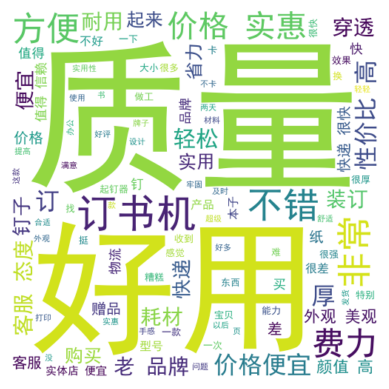

In [30]:
cloud1 = WordCloud(font_path=r"/usr/share/fonts/SimHei/SimHei.ttf",
                   #需要指定一个中文字体的路径才能正常显示中文
                    max_words=100,background_color="white",
                    width=500,height=500,margin=5).generate(comment_text)
                    #最大词的数量为100 图片宽度为800，高度为660，图片边缘为2 图片背景为白色
plt.axis("off")
plt.imshow(cloud1,interpolation='bilinear') #显示词云
cloud1.to_file('产品评论词云.png') #保存词云

In [31]:
#关键词提取
"""
词频分析时，假定每个词语的地位是一样的，但是实际上文本中每个词对于反映文本内容来说的重要性并不相同。
识别关键词时候，不能但看词频，还要考虑词语的权重

TF-IDF（term frequency-inverse document frequency）是一种常用加权技术，其基本假设是，
一个词语在一个文档中出现次数越多，同时在所有文档集合中出现次数越少，则越能够代表该文档，能使之与其它文档区分。
TF-IDF在关键词提取、主题分析和文本比较时常常会使用。

TF=某个词在文章中出现的次数/文章的总次数

IDF 逆文档频率=log(语料库的文档总数/（包含该词的文档数+1）)


jieba.analyse.extract_tags()是基于TF-IDF算法来提取文本关键词的一个工具

jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())

参数解释可参考: https://github.com/fxsjy/jieba

"""
import jieba.analyse as analyse
import pandas as pd
from pandas import DataFrame

keywords = analyse.extract_tags(comment_text, topK=50, withWeight=True)

key_df = DataFrame(keywords,columns=['关键词','权重'])

all_keywords =" ".join(key_df['关键词'].values.tolist())

print(keywords)
print()
print(all_keywords)

[('好用', 0.39469174992317885), ('订书机', 0.33251671200119204), ('质量', 0.2916723092554172), ('快递', 0.18597705029854306), ('客服', 0.17224309341298016), ('实惠', 0.16813109290827816), ('费力', 0.16330726399520532), ('价格便宜', 0.14674489908675498), ('性价比', 0.1466677957749934), ('颜值', 0.14250716228622515), ('不错', 0.13933771510052978), ('耗材', 0.13512788695430464), ('方便', 0.12518097402854306), ('装订', 0.12234148798649006), ('价格', 0.11442168805149668), ('品牌', 0.1119163652570331), ('便宜', 0.11059900841769538), ('非常', 0.11040504782487416), ('耐用', 0.10883435397031788), ('穿透', 0.10605375114472848), ('钉子', 0.09748553415819868), ('轻松', 0.09324521828516556), ('外观', 0.0930379838488212), ('省力', 0.09172637253931126), ('美观', 0.09053341856741721), ('赠品', 0.08343957830701985), ('值得', 0.07970342120092716), ('实用', 0.07061695951827815), ('态度', 0.07025932617067548), ('很快', 0.06766066597362914), ('实体店', 0.05680860302834437), ('信赖', 0.05633808016966887), ('购买', 0.05327048920413245), ('很差', 0.049632202165933774), ('本子', 0.04

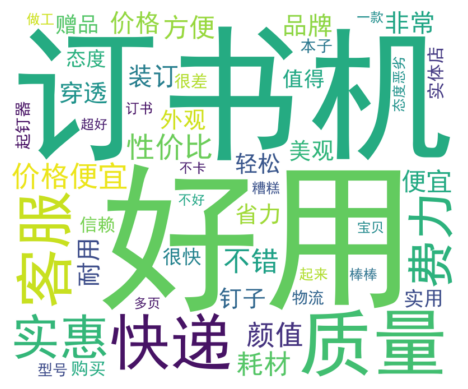

In [32]:
cloud2 = WordCloud(font_path=r"/usr/share/fonts/SimHei/SimHei.ttf",
                   #需要指定一个中文字体的路径才能正常显示中文
                    max_words=50,background_color="white",
                    width=800,height=660,margin=5).generate_from_frequencies(dict(keywords))

plt.axis("off")
plt.imshow(cloud2,interpolation='bilinear') #显示词云
cloud1.to_file('产品评论词云2.png') #保存词云

In [33]:
# 情感分析
from snownlp import SnowNLP
"""

cnsenti

这里直接使用SnowNLP训练好的模型来计算情感得分
基本用法: SnowNLP(text).sentiments，直接计算出text的情感得分(0-1)，之后需要设置值划分情感类
在实际的项目中，如果有充足的标签好的训练数据，也可以自己重新训练情感分析的模型再使用
大致分为如下的几个步骤:
1.准备正负样本，并分别保存，如正样本保存到pos.txt，负样本保存到neg.txt;
2.利用snownlp训练新的模型
3.保存好新的模型并用于计算情感得分
更多信息可参考: https://github.com/isnowfy/snownlpnn
"""
eg2="产品非常好用，轻便且美观。"
eg3 ="糟糕的体验，差劲的服务，非常不值。"
print('例句2的情感得分是%.2f' %SnowNLP(eg2).sentiments)
print('例句3的情感得分是%.2f' %SnowNLP(eg3).sentiments)

例句2的情感得分是0.98
例句3的情感得分是0.02


In [34]:
## 计算产品评价的情感得分
comment_df['评论情感得分'] = comment_df['评论内容'].apply(lambda x:SnowNLP(x).sentiments )

comment_df['评论情感得分'].describe() #查看评论情感得分的描述性统计值

count    1.000000e+02
mean     7.103067e-01
std      3.858636e-01
min      7.273800e-09
25%      5.638219e-01
50%      9.286707e-01
75%      9.924173e-01
max      9.999988e-01
Name: 评论情感得分, dtype: float64

In [35]:
print(comment_df.head(5))

   评论ID                    评论内容                          评论分词    评论情感得分
0     1  很难用，太大很费力，不耐用，客服的态度很差！  [难用, 太大, 费力, 耐用, 客服, 态度, 很差]  0.045688
1     2        宝贝做工精细，质量好，价格便宜。        [宝贝, 做工, 精细, 质量, 价格便宜]  0.996921
2     3               好用而且外观美观！                  [好用, 外观, 美观]  0.955534
3     4     质量非常好，快递很快，用着省力订得牢固  [质量, 非常, 快递, 很快, 省力, 订得, 牢固]  0.588402
4     5           老品牌 值得信赖 价格便宜         [老, 品牌, 值得, 信赖, 价格便宜]  0.997625


In [36]:
## 以0.3，0.7为截点区分差评、中评、好评

import numpy as np
comment_df[ '评价好坏'] = np.where(comment_df['评论情感得分']<0.3,'差评',#使用np.where()按条件生成新序列
                               np.where(comment_df['评论情感得分']<0.7,'中评','好评'))
print("产品差评数为%d条"% (comment_df['评价好坏']=='差评').sum())
comment_df.head()

产品差评数为22条


,评论ID,评论内容,评论分词,评论情感得分,评价好坏
0,1,很难用，太大很费力，不耐用，客服的态度很差！,"[难用, 太大, 费力, 耐用, 客服, 态度, 很差]",0.045688,差评
1,2,宝贝做工精细，质量好，价格便宜。,"[宝贝, 做工, 精细, 质量, 价格便宜]",0.996921,好评
2,3,好用而且外观美观！,"[好用, 外观, 美观]",0.955534,好评
3,4,质量非常好，快递很快，用着省力订得牢固,"[质量, 非常, 快递, 很快, 省力, 订得, 牢固]",0.588402,中评
4,5,老品牌 值得信赖 价格便宜,"[老, 品牌, 值得, 信赖, 价格便宜]",0.997625,好评


In [37]:
# 语义网络分析
## 分析前30个关键词之间的语义网络关系
import numpy as np
feature_word = [x[0] for x in keywords[0:30]] #提取前30个关键词
## 利用特征词构建共词矩阵: 不同特征词成对出现的次数所构成的矩阵
Common_matrix = np.empty((len(feature_word),len(feature_word))) # 构建共词矩阵，大小为[词数]x[词数
row,col = np.diag_indices_from(Common_matrix) #获取主对角线上的元素的行索引和列索引序列
Common_matrix[row,col] = np.nan #共词矩阵的对角线应设置为空值

## 计算每一对词语共同出现在同一个评价中的次数
for i in range(len(feature_word)):
    for j in range(i+1,len(feature_word)):
        wl = feature_word[i]
        w2 = feature_word[j]
        common_freq = 0
        for c in comment_df["评论分词"]: # 遍历每一条评论，如果词语w1和w2在同一个评论数出现，则这一对词语出现次数+1
            if ((wl in c) and (w2 in c)):
                common_freq += 1
        Common_matrix[i][j]= common_freq
        Common_matrix[j][i]= common_freq
                          
common_df = pd.DataFrame(Common_matrix)
common_df.columns = feature_word
common_df.index = feature_word
common_df 

,好用,订书机,质量,快递,客服,实惠,费力,价格便宜,性价比,颜值,...,钉子,轻松,外观,省力,美观,赠品,值得,实用,态度,很快
好用,NaN,4.0,9.0,4.0,0.0,7.0,2.0,4.0,2.0,2.0,...,1.0,4.0,3.0,0.0,3.0,1.0,2.0,1.0,0.0,2.0
订书机,4.0,NaN,7.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,...,2.0,3.0,1.0,3.0,0.0,3.0,2.0,3.0,1.0,2.0
质量,9.0,7.0,NaN,7.0,6.0,6.0,4.0,5.0,3.0,2.0,...,1.0,0.0,2.0,1.0,2.0,0.0,4.0,1.0,3.0,6.0
快递,4.0,3.0,7.0,NaN,0.0,5.0,0.0,0.0,2.0,2.0,...,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,6.0
客服,0.0,1.0,6.0,0.0,NaN,0.0,9.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
实惠,7.0,1.0,6.0,5.0,0.0,NaN,0.0,0.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,3.0
费力,2.0,1.0,4.0,0.0,9.0,0.0,NaN,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
价格便宜,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,...,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0
性价比,2.0,2.0,3.0,2.0,0.0,2.0,0.0,4.0,NaN,1.0,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0
颜值,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,NaN,...,0.0,2.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0


In [38]:
## 可视化语义网络
### 首先将共词矩阵转化为构建语义网络图所需的数据格式(将稀疏矩阵进行堆叠)
common_df = common_df.replace(0.0,np.nan) #将数据中的0值替换为缺失值
common_df_stacked=common_df.stack().reset_index() #使用stack0将数据的列索引堆叠至行索引
common_df_stacked

,level_0,level_1,0
0,好用,订书机,4.0
1,好用,质量,9.0
2,好用,快递,4.0
3,好用,实惠,7.0
4,好用,费力,2.0
...,...,...,...
543,很快,外观,1.0
544,很快,省力,2.0
545,很快,美观,1.0
546,很快,值得,2.0


In [39]:
common_df_stacked.rename(columns={'level_0':'共同出现词语_1','level_1':'共同出现词语_2',0:'共同出现次数'},inplace=True)
common_df_stacked.sort_values(by=['共同出现次数' ],ascending=False,inplace=True) #按共现次数从高到低排序
common_df_stacked

,共同出现词语_1,共同出现词语_2,共同出现次数
114,实惠,价格,13.0
272,价格,实惠,13.0
522,态度,客服,9.0
105,客服,态度,9.0
53,质量,好用,9.0
...,...,...,...
327,便宜,实用,1.0
30,订书机,实惠,1.0
29,订书机,客服,1.0
336,非常,性价比,1.0


23


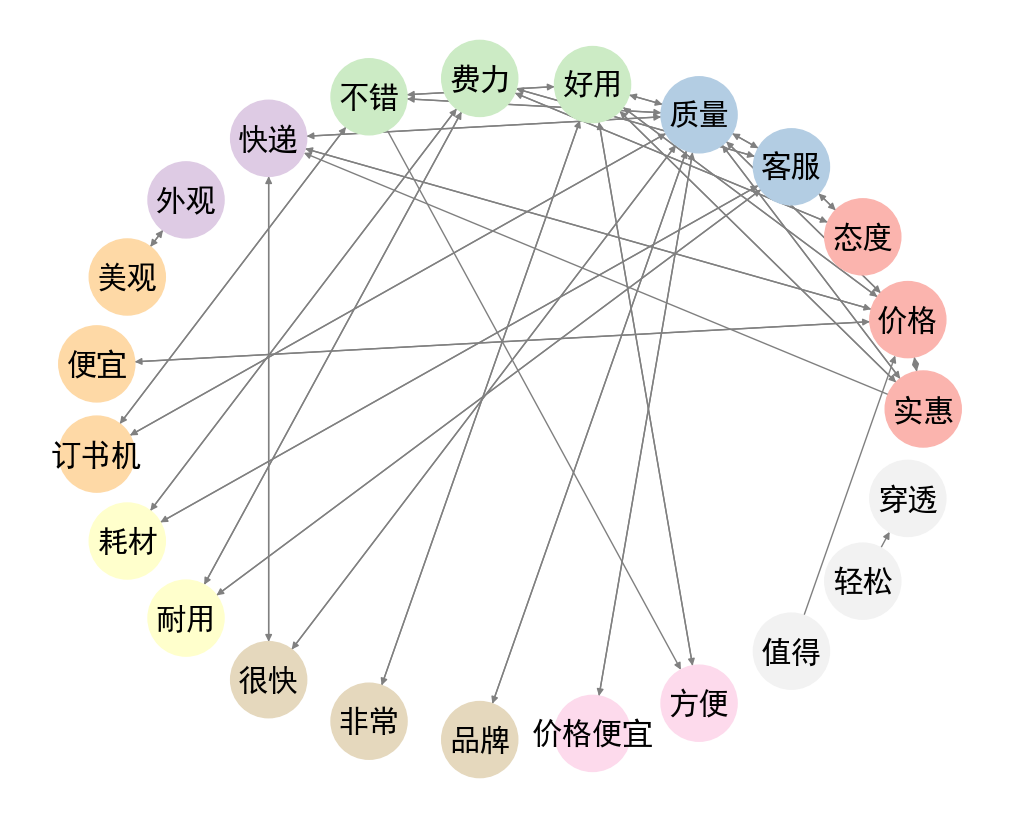

In [40]:
## 绘制语义网络图
"""
可以使用networkx库来绘制语义网络图
基本用法:使用nx.DiGraph0创建空的有向图对象，再调用add edge0函数添加节点和边:
使用布局函数创建布局对象;
布局包括:
    circular_layout; 节点在一个圆环上均匀分布
    random_layout:节点随机分布
    shel1_layout:节点在同心圆上分布
    spring_layout: 用Fruchterman-Reingold算法排列节点(样子类似多中心放射状)
    spectral_layout: 根据图的拉普拉斯特征向量排列节点
使用nx.draw()绘制网络图，可以通过设置图形属性参数控制样式。
样式参数:
    node_size:指定节点的尺寸大小
    node_color:指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如’r’为红色，’b’为绿色等)
    node_shape:节点的形状(默认是圆形，用字符串’o’标识)
    alpha: 透明度(默认是1.0，不透明)
    width: 边的宽度
    edge_color: 边的颜色(默认为黑色)
    style: 边的样式(默认为实线，可选:solid’，'dashed’，’dotted’，'dashdot’)
    with_labels: 节点是否带标签 (默认为True)
    font_size: 节点标签字体大小
    font_color: 节点标签字体颜色 (默认为黑色)
    pos: 布局
详细信息可参考: https://networkx.org/documentation/stable/tutorial.htm

"""
import networkx as nx #参考 https://networkx.org/documentation/stable/tutorial.html
plt.rcParams['font.sans-serif'] =['SimHei'] #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示问题
G = nx.DiGraph()#创建一个空的有向图
node_listl = common_df_stacked['共同出现词语_1'].to_list() #设置节点数据
node_list2 = common_df_stacked['共同出现词语_2'].to_list()
weight_list= common_df_stacked['共同出现次数'].to_list() #设置边数据
### 显示前30组词对，每组词对都会以AB和BA的形式各出现一次，因此前30组词对应该是数据的前60行
for i in range(60):
    nodel = node_listl[i]
    node2 = node_list2[i]
    weight = weight_list[i]
    G.add_edge(nodel,node2,weight=weight) #为有向图添加节点和边的数据信息
pos = nx.circular_layout(G)                
node_list3=[]#获取图的节点
for node in G:
        node_list3.append(node)
print(len(node_list3))
plt.figure(figsize=(10,8)) #调整绘图尺寸
nx.draw(G,pos=pos,node_size=3000,
        node_color=range(len(node_list3)),cmap=plt.cm.Pastel1,
        font_size=22,edge_color='grey',with_labels=True) #绘制语义网络图        